Load Glutamatergic Data

In [1]:
import scanpy as sc
import numpy as np
import random
import matplotlib.pyplot as plt
import scanpy.external as sce
import nsforest as ns
sc.settings.verbosity = 3
sc.set_figure_params(dpi=100)
random.seed(66)

data_path = "G:/Shared drives/Opossum transcriptomics/Data/Mouse_M1/"

adata = sc.read_h5ad(data_path + "Mouse_M1_Glut.h5ad")
adata

In [2]:
adata.X = adata.raw.X

AnnData object with n_obs × n_vars = 85684 × 31053
    obs: 'class_label', 'cluster_label', 'batch', 'n_counts', 'leiden', 'class'
    var: 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'

Analyze Glutamatergic Cells

In [3]:
sc.pp.highly_variable_genes(adata, min_mean=0.0125, max_mean=3, min_disp=0.5)
sc.pp.scale(adata, max_value=10)

extracting highly variable genes
    finished (0:00:08)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)
... as `zero_center=True`, sparse input is densified and may lead to large memory consumption


computing PCA
    on highly variable genes
    with n_comps=50
    finished (0:00:34)


2023-05-09 14:08:21,641 - harmonypy - INFO - Computing initial centroids with sklearn.KMeans...
2023-05-09 14:08:44,870 - harmonypy - INFO - sklearn.KMeans initialization complete.
2023-05-09 14:08:45,580 - harmonypy - INFO - Iteration 1 of 10
2023-05-09 14:09:45,744 - harmonypy - INFO - Iteration 2 of 10
2023-05-09 14:10:44,521 - harmonypy - INFO - Iteration 3 of 10
2023-05-09 14:11:43,980 - harmonypy - INFO - Iteration 4 of 10
2023-05-09 14:12:42,358 - harmonypy - INFO - Iteration 5 of 10
2023-05-09 14:13:39,633 - harmonypy - INFO - Iteration 6 of 10
2023-05-09 14:14:06,019 - harmonypy - INFO - Iteration 7 of 10
2023-05-09 14:14:29,997 - harmonypy - INFO - Iteration 8 of 10
2023-05-09 14:14:54,458 - harmonypy - INFO - Iteration 9 of 10
2023-05-09 14:15:18,065 - harmonypy - INFO - Converged after 9 iterations


computing neighbors


c:\Users\TLab\anaconda3\envs\scanpy\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:42)
running Leiden clustering
    finished: found 20 clusters and added
    'leiden', the cluster labels (adata.obs, categorical) (0:01:02)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:01:17)


C:\Ryan\GitHub\scanpy\scanpy\plotting\_tools\scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


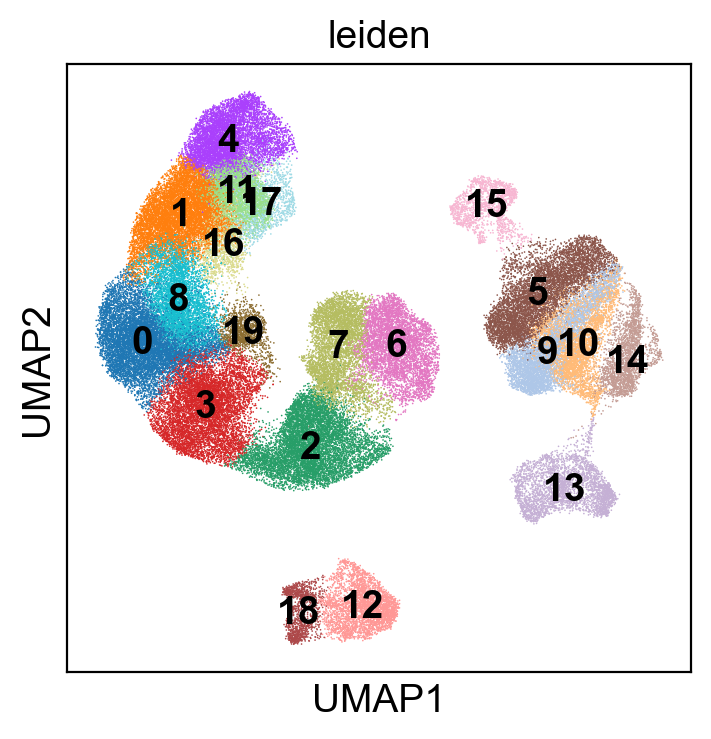

In [4]:
sc.tl.pca(adata, svd_solver="arpack")
sce.pp.harmony_integrate(adata, "batch")
sc.pp.neighbors(adata, n_neighbors=25, use_rep="X_pca_harmony")
sc.tl.leiden(adata)
sc.tl.umap(adata)
sc.pl.umap(adata, color=["leiden"], legend_loc="on data")

C:\Ryan\GitHub\scanpy\scanpy\plotting\_tools\scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


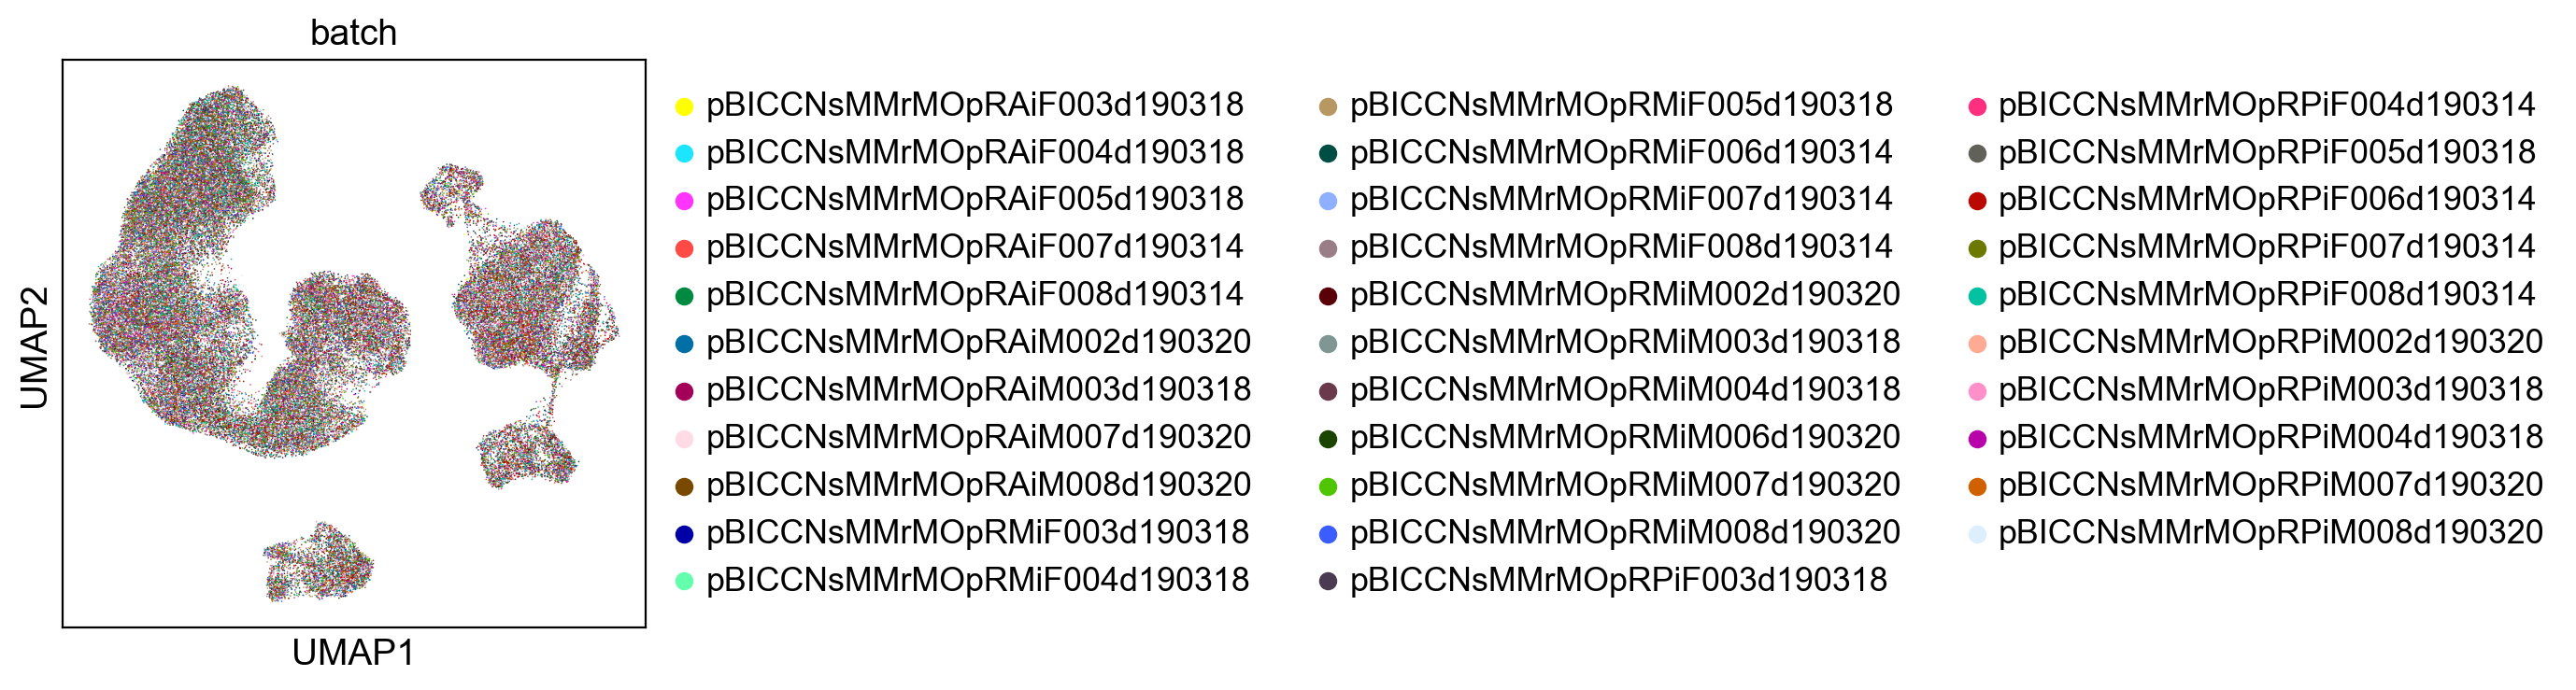

In [5]:
sc.pl.umap(adata, color=["batch"])

C:\Ryan\GitHub\scanpy\scanpy\plotting\_tools\scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


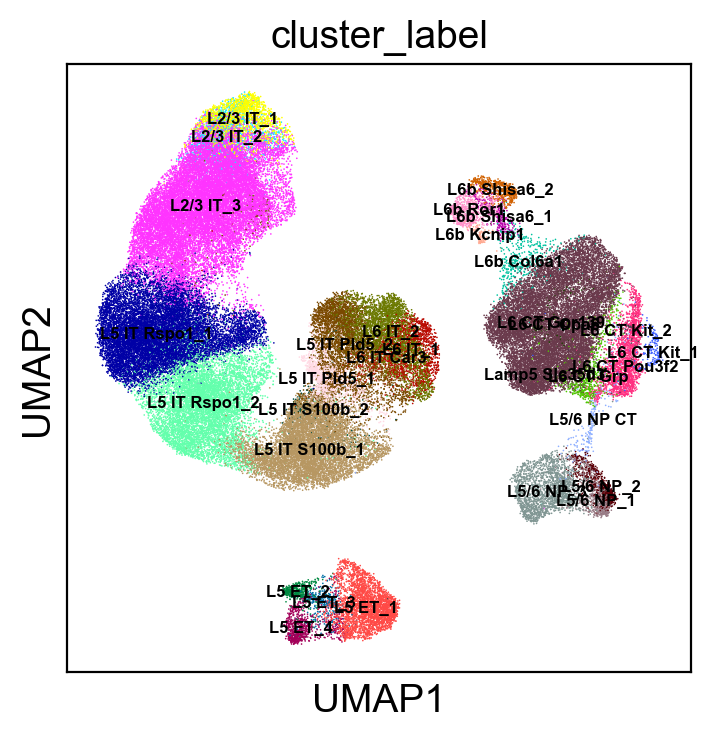

In [8]:
sc.pl.umap(adata, color=["cluster_label"], legend_loc="on data", legend_fontsize=6)

categories: 0, 1, 2, etc.
var_group_labels: General, 2/3, 2/3 & 4, etc.


C:\Ryan\GitHub\scanpy\scanpy\plotting\_dotplot.py:747: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


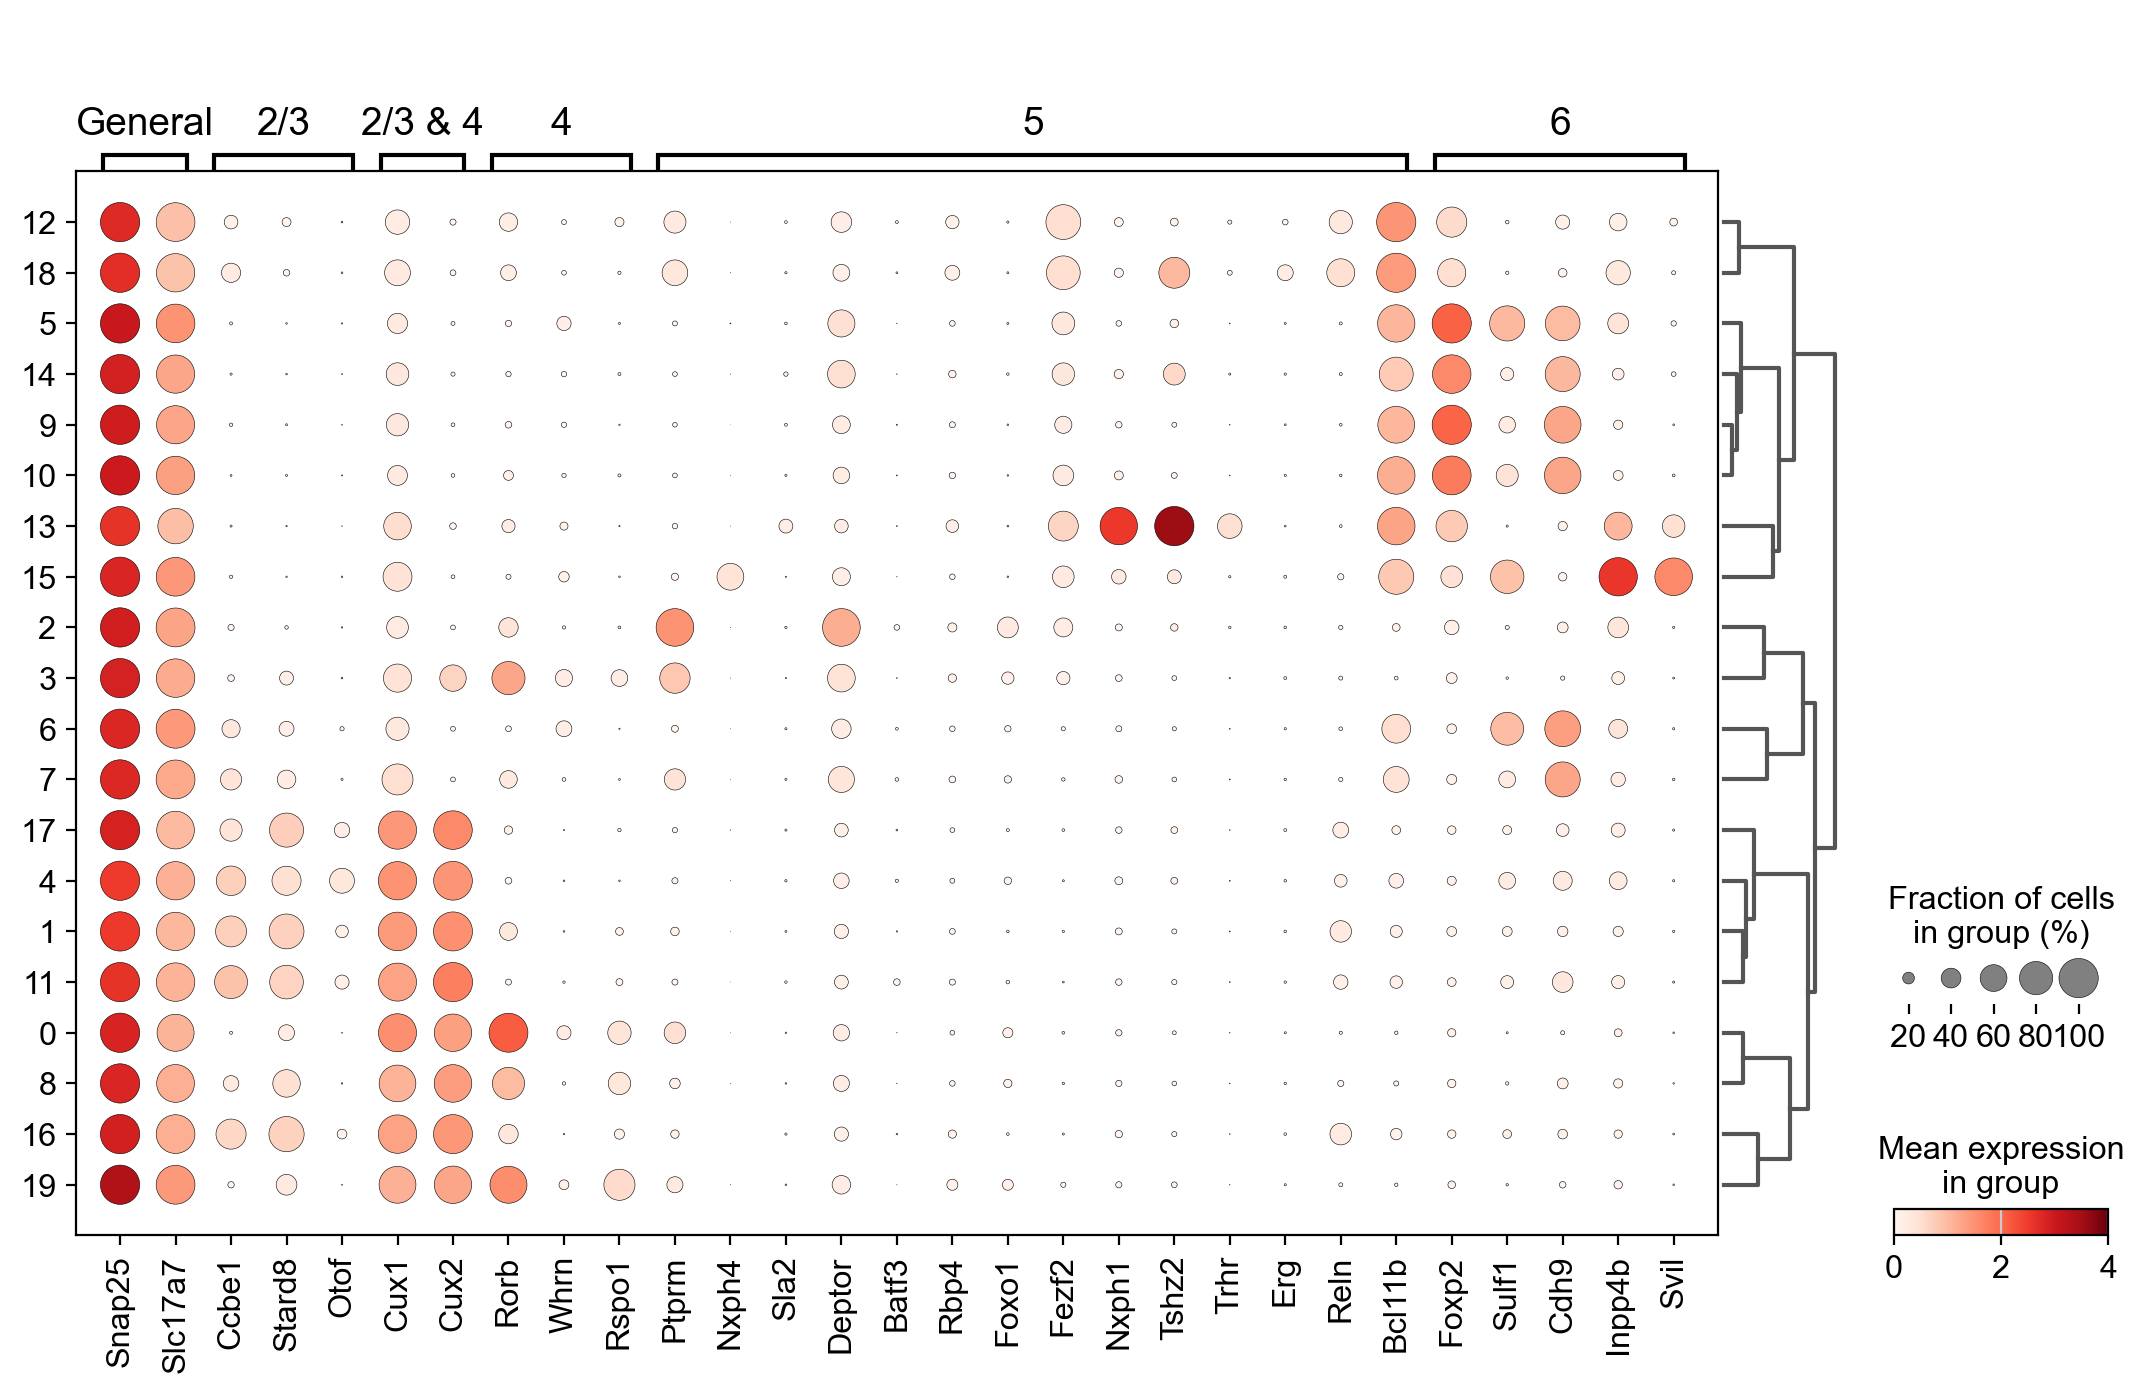

In [13]:
glutamatergic_markers = [
                         "Snap25", "Slc17a7", # general "Slc17a6", 
                         "Ccbe1", "Stard8", "Otof", # L2/3
                         "Cux1", "Cux2", # L2/3 & L4
                         "Rorb", "Whrn", "Rspo1", # L4
                         "Ptprm", "Nxph4", "Sla2", 
                         "Deptor", "Batf3", "Rbp4", "Foxo1", "Fezf2", "Nxph1", "Tshz2", "Trhr", "Erg", "Reln", "Bcl11b", # L5
                         "Foxp2", "Sulf1", "Cdh9", "Inpp4b", "Svil" # L6
                        ]

sc.pl.dotplot(
    adata, 
    glutamatergic_markers, 
    groupby="leiden", 
    dendrogram=True, 
    # swap_axes=True, 
    vmin=0, vmax=4, 
    var_group_positions=[(0, 1), (2, 4), (5, 6), (7, 9), (10, 23), (24, 28)], 
    var_group_labels=["General", "2/3", "2/3 & 4", "4", "5", "6"], 
    var_group_rotation=0, 
            )

Label Subclasses via Marker Genes

In [47]:
subclass_idx = {
            "L2/3" : ["1", "4", "11", "16", "17"], 
            "L4/5" : ["0", "8", "19"], 
            "L5IT" : ["2", "3"], 
            "L5ET" : ["12", "18"], 
            "L5NP" : ["13"], 
            "L6IT" : ["6", "7"], 
            "L6CT" : ["5", "9", "10", "14"], 
            "L6b" : ["15"], 
               }

adata.uns["subclass_idx"] = subclass_idx

adata.obs["subclass"] = [None] * adata.shape[0]

for name, idx in subclass_idx.items():
    mask = np.isin(adata.obs["leiden"], idx)
    adata.obs.loc[mask, "subclass"] = [name] * np.sum(mask)

In [48]:
adata.obs

,class_label,cluster_label,batch,n_counts,leiden,class,subclass
pBICCNsMMrMOpRAiF003d190318_AAACCCAAGGCCTTGC,Glutamatergic,L6b Col6a1,pBICCNsMMrMOpRAiF003d190318,34232.0,5,glutamatergic,L6CT
pBICCNsMMrMOpRAiF003d190318_AAACGAAAGGGCGAGA,Glutamatergic,L5/6 NP_3,pBICCNsMMrMOpRAiF003d190318,21864.0,13,glutamatergic,L5NP
pBICCNsMMrMOpRAiF003d190318_AAAGGATCAACACGAG,Glutamatergic,L6b Ror1,pBICCNsMMrMOpRAiF003d190318,30327.0,15,glutamatergic,L6b
pBICCNsMMrMOpRAiF003d190318_AAAGGGCAGTTCAACC,Glutamatergic,L6b Col6a1,pBICCNsMMrMOpRAiF003d190318,18847.0,5,glutamatergic,L6CT
pBICCNsMMrMOpRAiF003d190318_AACAACCCAATGAACA,Glutamatergic,L6 CT Cpa6,pBICCNsMMrMOpRAiF003d190318,19952.0,10,glutamatergic,L6CT
...,...,...,...,...,...,...,...
pBICCNsMMrMOpRPiM008d190320_TTTGTTGAGGTAAGGA,Glutamatergic,L2/3 IT_3,pBICCNsMMrMOpRPiM008d190320,8627.0,11,glutamatergic,L2/3
pBICCNsMMrMOpRPiM008d190320_TTTGTTGTCGAGCCAC,Glutamatergic,L6 CT Cpa6,pBICCNsMMrMOpRPiM008d190320,9983.0,5,glutamatergic,L6CT
pBICCNsMMrMOpRPiM008d190320_TTTGTTGTCGCGGACT,Glutamatergic,L5 ET_4,pBICCNsMMrMOpRPiM008d190320,17228.0,18,glutamatergic,L5ET
pBICCNsMMrMOpRPiM008d190320_TTTGTTGTCGGTAACT,Glutamatergic,L5/6 NP_2,pBICCNsMMrMOpRPiM008d190320,10136.0,13,glutamatergic,L5NP


C:\Ryan\GitHub\scanpy\scanpy\plotting\_tools\scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
C:\Ryan\GitHub\scanpy\scanpy\plotting\_tools\scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


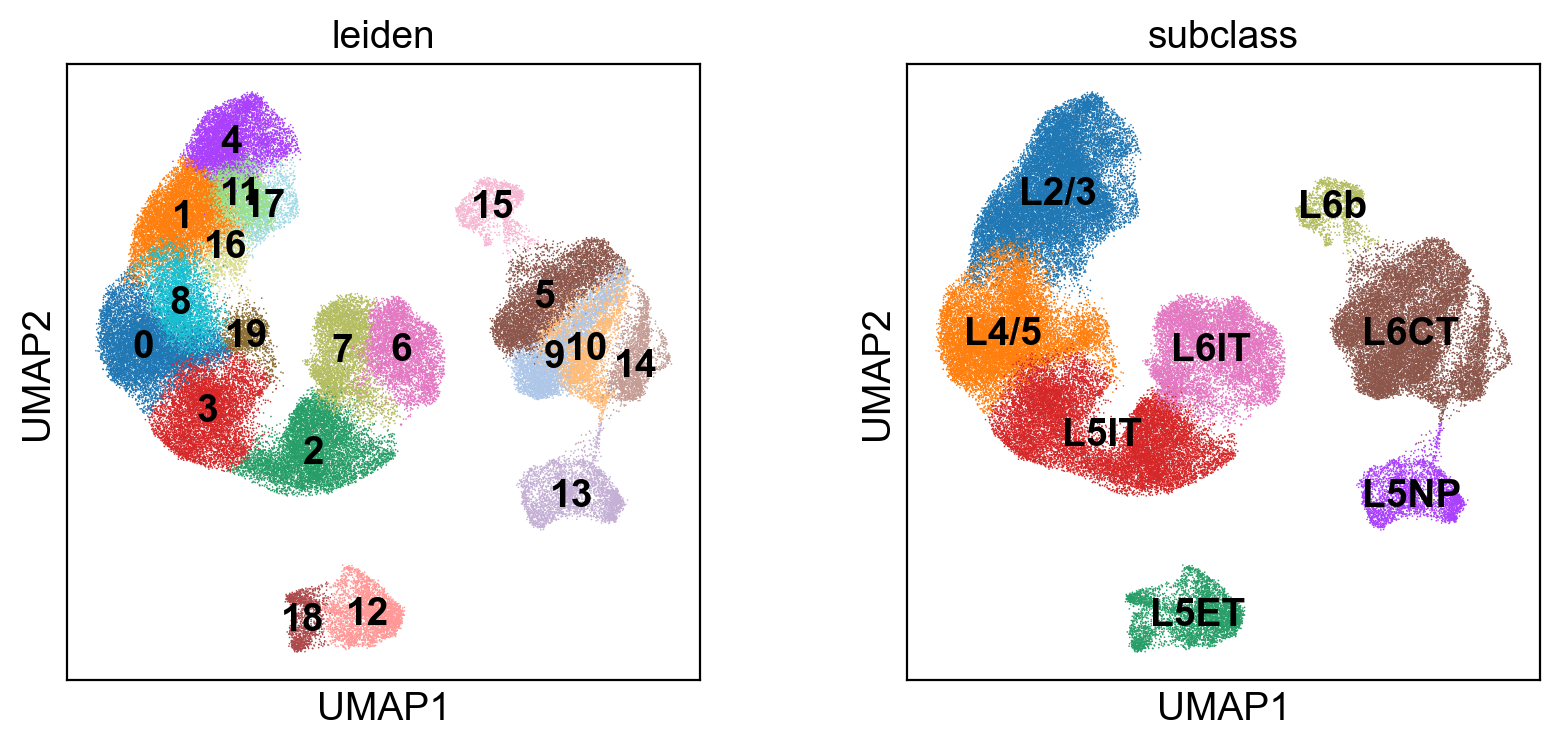

In [49]:
sc.pl.umap(adata, color=["leiden", "subclass"], legend_loc="on data")

Save Clustered AnnData Object

In [50]:
adata.write_h5ad(data_path + "Mouse_M1_Glut_Clustered.h5ad")

Load Clustered AnnData Object for Differential Expression Analysis

In [22]:
import scanpy as sc
import numpy as np
import random
import matplotlib.pyplot as plt
import scanpy.external as sce
import nsforest as ns
sc.settings.verbosity = 3
sc.set_figure_params(dpi=100)
random.seed(66)

data_path = "G:/Shared drives/Opossum transcriptomics/Data/Mouse_M1/"

adata = sc.read_h5ad(data_path + "Mouse_M1_Glut_Clustered.h5ad")
adata

In [ ]:
adata.X = adata.raw.X

Find Marker Genes for L2/3 Clusters

In [51]:
leiden = adata.obs["leiden"]

l23_idx = ["1", "4", "11", "16", "17"]
l23_mask = np.isin(leiden, l23_idx)
adata_l23 = adata[l23_mask, :]

results = ns.NSForest(
                    adata_l23, 
                    cluster_header="leiden", 
                    n_trees=1000, 
                    n_genes_eval=6, 
                      )

results.to_csv(data_path + "NSForest/L23_results.csv")

In [ ]:
results

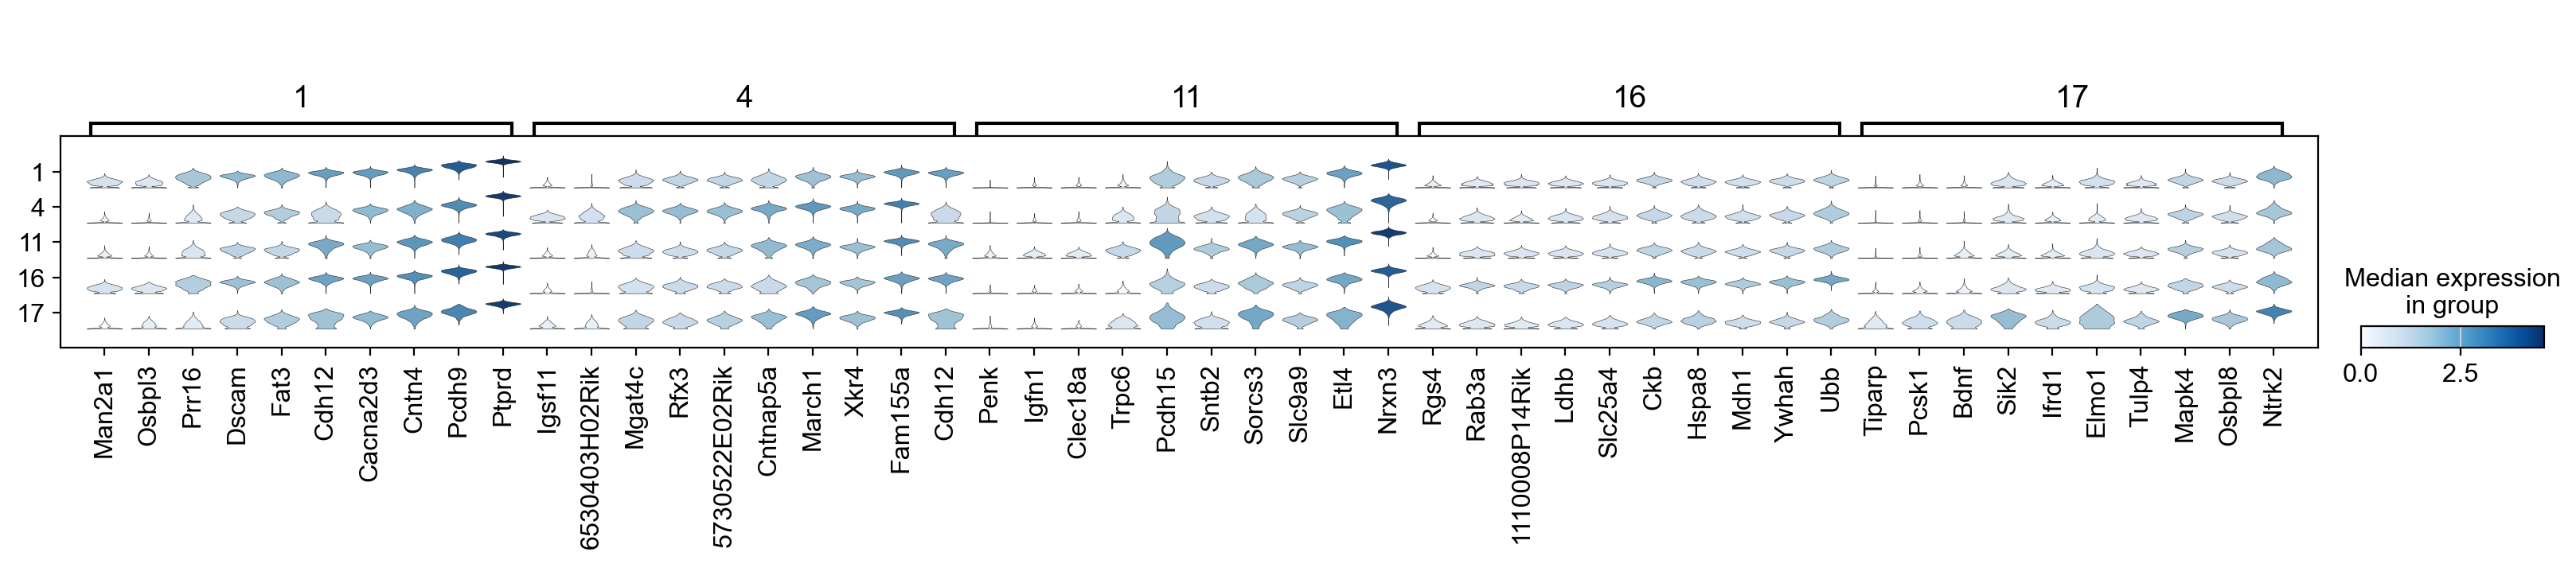

In [44]:
markers = dict(zip(results['clusterName'], results['binary_genes']))
sc.pl.stacked_violin(adata_l23, markers, groupby="leiden", swap_axes=False)

C:\Ryan\GitHub\scanpy\scanpy\plotting\_dotplot.py:747: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


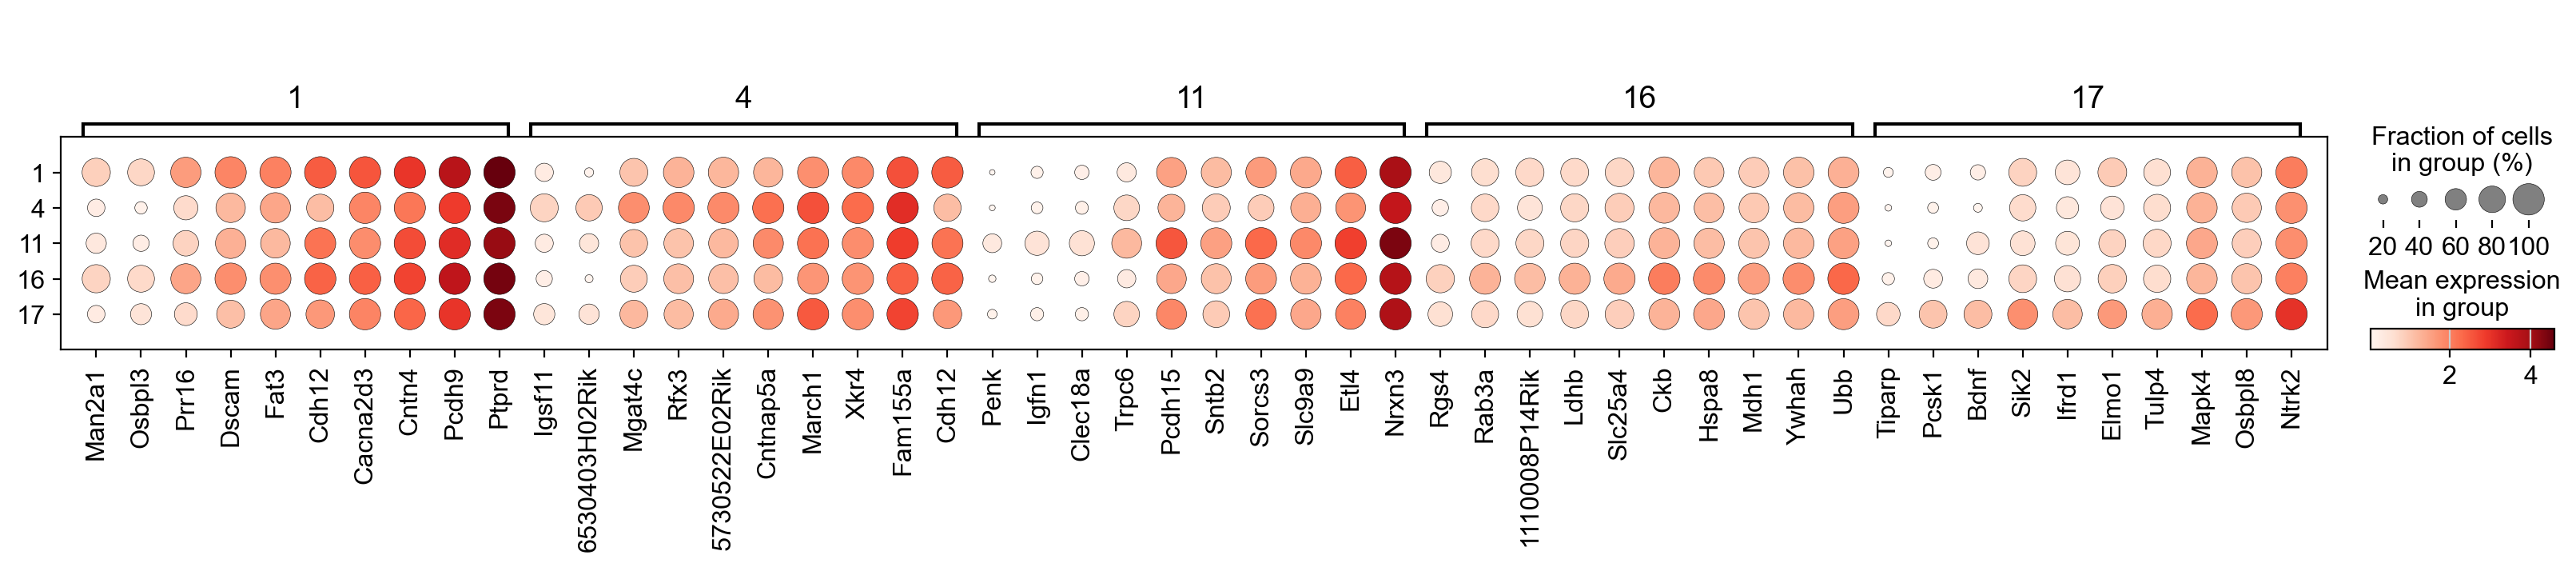

In [45]:
sc.pl.dotplot(adata_l23, markers, groupby="leiden", swap_axes=False)